# Web Scraping

Testing the config file

In [3]:
from scraper.config import get_driver
driver = get_driver()

In [ ]:
from scraper.controller import ContentFetcher
master = ContentFetcher(driver)

In [ ]:
master.process_url("https://www.nitj.ac.in/")

In [1]:
text1 = """
October 10th, 2017 The 2020-Dec-21 9 dec, 1020 1st January 2020 
January 12 2021 jan 6 meeting was 9/2/2024 or 04.04.17 or 9/12/14 
may 2020-12-31 be at 01/02/2023 2024-09-06 scheduled on 04.04.17, 
but we moved it to December 21, 1900.
Another date was 1st of May, 2020, and finally, the 9 Dec 2020.
You can contact me at user@example.com or support@sub.example.co.in.
danish.cs.22@nitj.ac.in and mahajandanish0508@gmail.com, mahajan.danish.code@gmail.com and 
For more information, email us at "john.doe"@company.com or admin@192.168.1.1.
Also, reach out to user-name@example.org or info@example.photography.
Visit our website at http://example.com or check out our FTP server at ftp://files.example.org.
For more https://www.nitj.ac.in details, refer to https://www.example.com/path/to/resource?param1=value1#section1.
Also, visit https://192.168.1.1:8080/test or a shortened URL like http://bit.ly/xyz123.
Here are some phone numbers:
+91 9876543210
022-12345678
987 654 3210
+91 9876543210 ext 1234
(022) 9876543210
(022)-12345678
"""

In [ ]:
from TextPreprocessing.Preprocess_Text import TextProcessor

processor = TextProcessor()
finalText = processor.process_text(text1)
print(finalText)

Relational Database

In [31]:
import mysql.connector
import json

# Connect to MySQL
conn = mysql.connector.connect(
    host='127.0.0.1', 
    user='root',
    password='your_password',
    database='cic'
)
cursor = conn.cursor()

In [ ]:
with open('extracted_data.json', 'r') as file:
    data_d = json.load(file)

result_list = []

for section, subsections in data_d.items():
    for subsection, items in subsections.items():
        for item, content in items.items():
            result_tuple = (section, subsection, item)
            result_list.append(result_tuple)

# SQL statement to insert data into the hierarchy table
insert_query = """
INSERT INTO hierarchy (section, subsection, subsubsection)
VALUES (%s, %s, %s)
"""

# Iterate over the result_list and insert each tuple into the hierarchy table
for result_tuple in result_list:
    cursor.execute(insert_query, result_tuple)

# Commit the changes to the database
conn.commit()

In [2]:
cursor.execute("SELECT * FROM hierarchy")
rows = cursor.fetchall()

print(rows) # list of tuples

[(1, 'Administration', 'About Us', 'Vision, Mission & Values'), (2, 'Administration', 'About Us', 'NITJ Rankings & Awards'), (3, 'Administration', 'About Us', 'Institute History'), (4, 'Administration', 'About Us', 'Explore NITJ'), (5, 'Administration', 'About Us', 'Institute Prospectus'), (6, 'Administration', 'About Us', 'Institute Flyers'), (7, 'Administration', 'About Us', 'Virtual Tour'), (8, 'Administration', 'About Us', 'Newsletters'), (9, 'Administration', 'About Us', 'Reach Us'), (10, 'Administration', 'Leadership', 'Organisational Chart'), (11, 'Administration', 'Leadership', 'Chairperson'), (12, 'Administration', 'Leadership', 'Director'), (13, 'Administration', 'Leadership', 'Registrar'), (14, 'Administration', 'Leadership', 'Dean Academics'), (15, 'Administration', 'Leadership', 'Dean Student Welfare'), (16, 'Administration', 'Leadership', 'Dean Faculty Welfare'), (17, 'Administration', 'Leadership', 'Dean Planning & Development'), (18, 'Administration', 'Leadership', 'Dea

In [3]:
# List to hold the new tuples in the format (sid, text, NULL)
new_tuples = []

with open("extracted_preprocessed_data.json", 'r') as file:
    data_d1 = json.load(file)

# Extract preprocessed text data and form new tuples
for sid, section, subsection, subsubsection in rows:
    try:
        # Access the text data from the nested dictionary structure
        text = data_d1[section][subsection][subsubsection]['text']['text']
        new_tuple = (sid, text, None)  # None represents NULL in MySQL
        new_tuples.append(new_tuple)
    except KeyError:
        new_tuples.append((sid, None, None))
        print(f"Data not found for section: {section}, subsection: {subsection}, subsubsection: {subsubsection}")

Data not found for section: Administration, subsection: About Us, subsubsection: Institute Prospectus
Data not found for section: Academics, subsection: Academic System, subsubsection: Standard Operationg Procedures (SOP)
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: B.Tech.
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: M.Tech.
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: Ph.D.
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: Integrated B.Sc.-B.Ed.


In [4]:
new_tuples

[(1,
  "job tender placement resource library phone book e rp e office Dr b r mb ed ka r n io na l n ti tu te f EC hn ol og j al dh ar p UN ja b nd ia डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ Dr b r mb ed ka r n io na l n ti tu te f EC hn ol og j al dh ar p UN ja b nd ia u introduction Dr b r Ambedkar national Institute technology established year 1987 regional Engineering college given status national Institute technology deemed university government India October 17 2002 aegis ministry Education shiksha mantralaya new delhi ministry Education shiksha mantralaya government India declared Institute “ Institute national importance ” act Parliament- 2007 large number reputed industrial house country visit Institution select final year student engineers/ management trainee one 

In [ ]:
# SQL query to insert data into text_data table
insert_query = """
INSERT INTO text_data (text_id, text, embedding_id)
VALUES (%s, %s, %s)
"""

# Insert each new tuple into the text_data table
for new_tuple in new_tuples:
    cursor.execute(insert_query, new_tuple)

In [ ]:
# Commit the changes to the database
conn.commit()

In [5]:
rows

[(1, 'Administration', 'About Us', 'Vision, Mission & Values'),
 (2, 'Administration', 'About Us', 'NITJ Rankings & Awards'),
 (3, 'Administration', 'About Us', 'Institute History'),
 (4, 'Administration', 'About Us', 'Explore NITJ'),
 (5, 'Administration', 'About Us', 'Institute Prospectus'),
 (6, 'Administration', 'About Us', 'Institute Flyers'),
 (7, 'Administration', 'About Us', 'Virtual Tour'),
 (8, 'Administration', 'About Us', 'Newsletters'),
 (9, 'Administration', 'About Us', 'Reach Us'),
 (10, 'Administration', 'Leadership', 'Organisational Chart'),
 (11, 'Administration', 'Leadership', 'Chairperson'),
 (12, 'Administration', 'Leadership', 'Director'),
 (13, 'Administration', 'Leadership', 'Registrar'),
 (14, 'Administration', 'Leadership', 'Dean Academics'),
 (15, 'Administration', 'Leadership', 'Dean Student Welfare'),
 (16, 'Administration', 'Leadership', 'Dean Faculty Welfare'),
 (17, 'Administration', 'Leadership', 'Dean Planning & Development'),
 (18, 'Administration', '

In [6]:
img_tuples = []

for sid, section, subsection, subsubsection in rows:
    try:
        for img in data_d1[section][subsection][subsubsection]['images']:
                url = img['url']
                desc = img['description']
                desc_ocr = img['description_ocr']
                desc_capt = img['description_caption']
                form = img['format']
                sib = img['sibling_info']
                img_tuple = (sid, url, desc, desc_ocr, desc_capt, form, sib, None)  # None represents NULL in MySQL
                img_tuples.append(img_tuple)
    except KeyError:
        print(f"Data not found for section: {section}, subsection: {subsection}, subsubsection: {subsubsection}")

Data not found for section: Administration, subsection: About Us, subsubsection: Institute Prospectus
Data not found for section: Academics, subsection: Academic System, subsubsection: Standard Operationg Procedures (SOP)
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: B.Tech.
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: M.Tech.
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: Ph.D.
Data not found for section: Admissions, subsection: Institute Flyers, subsubsection: Integrated B.Sc.-B.Ed.


[(1,
  'https://www.nitj.ac.in/public/assets/images/Rectangle 47 (1).png',
  '',
  '',
  'black white silhouette man face',
  'png',
  'job tender placement resource library phone book er pe office dr b r mb ed ka r n io na l n ti tu te f ec hn ol og j al dh ar p UN ja b ND ia डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ dr b r mb ed ka r n io na l n ti tu te f ec hn ol og j al dh ar p UN ja b ND ia administration u vision mission value ni tj ranking award institute history explore n jinstitute prospectus institute flyer virtual tour newsletter compendium reach u leadership organisational chart chairperson director registrar dean academic dean student welfare dean faculty welfare dean planning development dean research consultancy dean industry international affair hostel admini
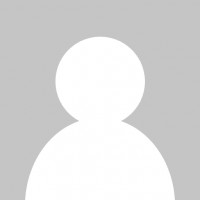
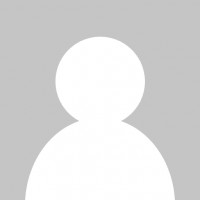
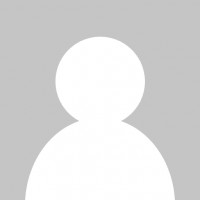
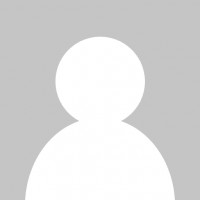
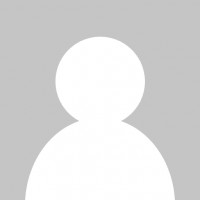
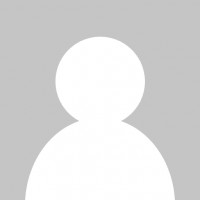
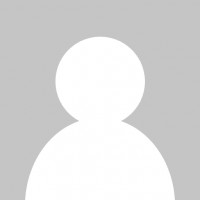
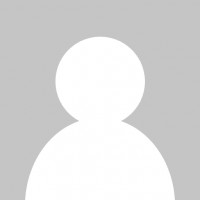
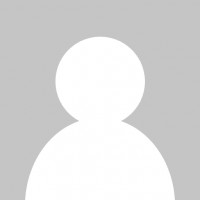
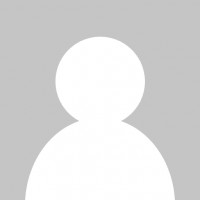
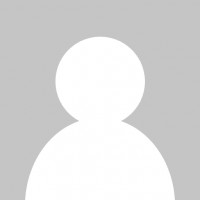
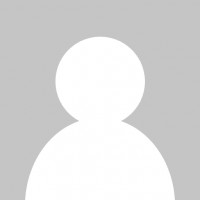
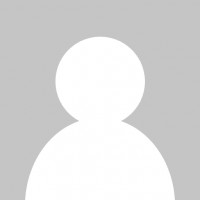
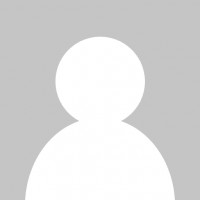
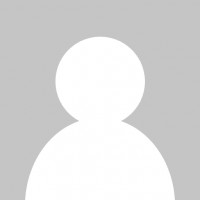
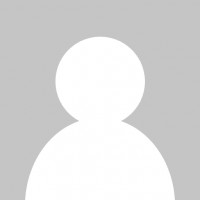
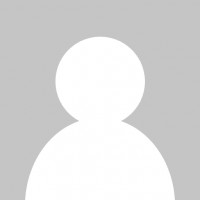
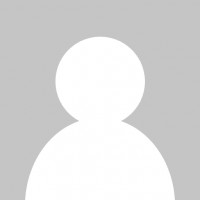
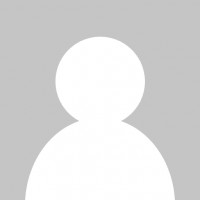
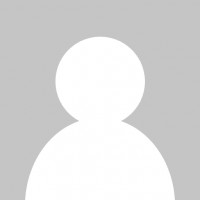
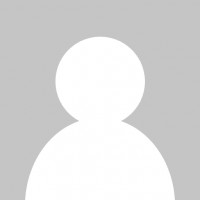
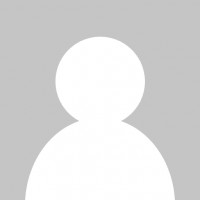
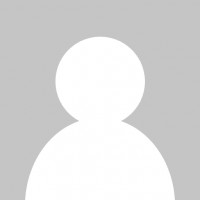
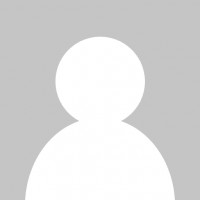
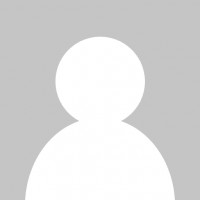
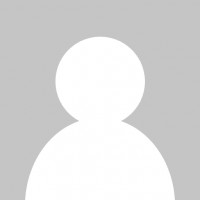
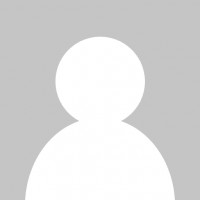
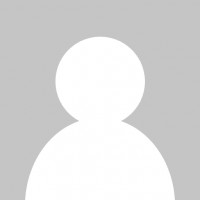
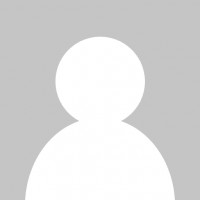
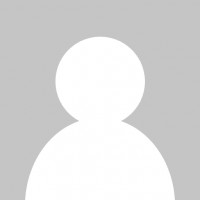
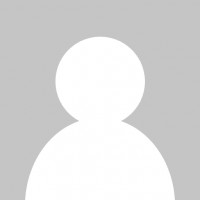
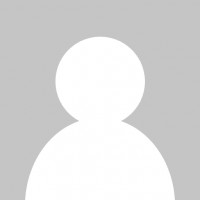
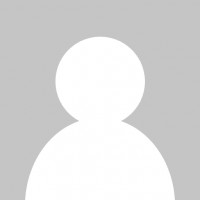
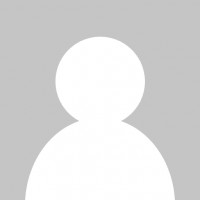
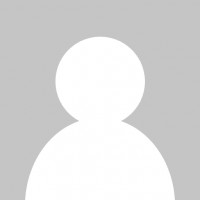
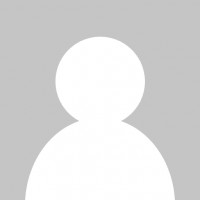
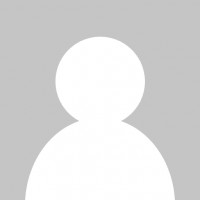
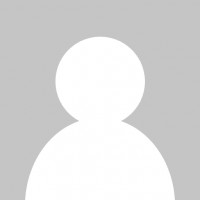

In [7]:
img_tuples

In [8]:
query = """
    INSERT INTO images_data (
        iid, 
        image_url, 
        description, 
        description_ocr, 
        description_caption, 
        format, 
        sibling_info, 
        embedding_id
    ) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

# Execute the query with the data
cursor.executemany(query, img_tuples)

In [9]:
conn.commit()

Vector Database

In [32]:
import spacy
import faiss
import numpy as np
import uuid

nlp = spacy.load("en_core_web_lg")

dimension = 300  
index = faiss.IndexFlatL2(dimension)  

cursor.execute("SELECT text_id, text FROM text_data")
rows = cursor.fetchall()

In [33]:
rows

[(1,
  "job tender placement resource library phone book e rp e office Dr b r mb ed ka r n io na l n ti tu te f EC hn ol og j al dh ar p UN ja b nd ia डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ Dr b r mb ed ka r n io na l n ti tu te f EC hn ol og j al dh ar p UN ja b nd ia u introduction Dr b r Ambedkar national Institute technology established year 1987 regional Engineering college given status national Institute technology deemed university government India October 17 2002 aegis ministry Education shiksha mantralaya new delhi ministry Education shiksha mantralaya government India declared Institute “ Institute national importance ” act Parliament- 2007 large number reputed industrial house country visit Institution select final year student engineers/ management trainee one 

In [8]:
embedding_map = {}

def process_text_data(text):
    if text is None or text.strip() == "":
        print("Empty or None text found. Using default embedding.")
        return tuple(np.zeros(dimension))
    doc = nlp(text)
    return tuple(doc.vector) 

def update_embedding_id_in_db(text_id, embedding_id):
    update_query = """
        UPDATE text_data
        SET embedding_id = %s
        WHERE text_id = %s
    """
    cursor.execute(update_query, (embedding_id, text_id))
    conn.commit()   
    print(f"Updated text_id {text_id} with embedding_id {embedding_id}")

def process_and_store_embeddings(rows):
    for row in rows:
        text_id, text = row   
        
        embedding = process_text_data(text)
        embedding_id = str(uuid.uuid4())
        embedding_map[embedding] = embedding_id


        embedding_array = np.expand_dims(np.array(embedding, dtype="float32"), axis=0)
        index.add(embedding_array)

        update_embedding_id_in_db(text_id, embedding_id)

        print(f"Text ID: {text_id} - Embedding ID: {embedding_id}")

    return list(embedding_map.values())

In [9]:
embedding_ids = process_and_store_embeddings(rows)

faiss.write_index(index, 'faiss_index.index')
print("FAISS index has been saved to 'faiss_index.index'")

Updated text_id 1 with embedding_id 156427f7-9c75-4919-9621-cdeccf639e27
Text ID: 1 - Embedding ID: 156427f7-9c75-4919-9621-cdeccf639e27
Updated text_id 2 with embedding_id 4a73c99b-aad5-4609-8032-ecd931eac217
Text ID: 2 - Embedding ID: 4a73c99b-aad5-4609-8032-ecd931eac217
Updated text_id 3 with embedding_id 3f66ebea-e15c-4fd0-ba6a-8ac16bf909f7
Text ID: 3 - Embedding ID: 3f66ebea-e15c-4fd0-ba6a-8ac16bf909f7
Updated text_id 4 with embedding_id 1c8a64e1-0c4e-4f36-acc8-5a2b7b4b20ac
Text ID: 4 - Embedding ID: 1c8a64e1-0c4e-4f36-acc8-5a2b7b4b20ac
Empty or None text found. Using default embedding.
Updated text_id 5 with embedding_id 483d2bc0-601f-4798-bcc1-4f1a220a1f6b
Text ID: 5 - Embedding ID: 483d2bc0-601f-4798-bcc1-4f1a220a1f6b
Updated text_id 6 with embedding_id 7cf51c05-82e1-40d9-8d67-43ba7770942b
Text ID: 6 - Embedding ID: 7cf51c05-82e1-40d9-8d67-43ba7770942b
Updated text_id 7 with embedding_id 05d94f46-9870-4d77-a5f3-81c6cc4b8ef5
Text ID: 7 - Embedding ID: 05d94f46-9870-4d77-a5f3-81c

In [11]:
index = faiss.read_index("faiss_index.index")

num_vectors = index.ntotal
print(f"Number of vectors in the index: {num_vectors}")

Number of vectors in the index: 164


In [19]:
len(embedding_map.values())

119

In [20]:
cursor.execute("SELECT iid, description, description_ocr, description_caption, sibling_info FROM images_data")
rows = cursor.fetchall()

In [21]:
len(rows)

2257

In [22]:
rows

[(1,
  '',
  '',
  'black white silhouette man face',
  'job tender placement resource library phone book er pe office dr b r mb ed ka r n io na l n ti tu te f ec hn ol og j al dh ar p UN ja b ND ia डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत डॉ बी आर अम्बेडकर राष्ट्रीय प्रौद्योगिकी संस्थान जालंधर पंजाब भारत ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ ਡਾ ਬੀ ਆਰ ਅੰਬੇਡਕਰ ਨੈਸ਼ਨਲ ਇੰਸਟੀਚਿਊਟ ਟੈਕਨਾਲੋਜੀ ਜਲੰਧਰ ਪੰਜਾਬ ਭਾਰਤ dr b r mb ed ka r n io na l n ti tu te f ec hn ol og j al dh ar p UN ja b ND ia administration u vision mission value ni tj ranking award institute history explore n jinstitute prospectus institute flyer virtual tour newsletter compendium reach u leadership organisational chart chairperson director registrar dean academic dean student welfare dean faculty welfare dean planning development dean research consultancy dean industry international affair hostel administration administrative officer technical officer governing body ni council boa

In [23]:
for row in rows:
    iid, description, description_ocr, description_caption, sibling_info = row

    combined_text = " ".join(
        filter(None, [description, description_ocr, description_caption, sibling_info])
    ).strip()

    if not combined_text:
        continue

    doc = nlp(combined_text)
    embedding = tuple(doc.vector)

    if embedding not in embedding_map:
        embedding_id = str(uuid.uuid4())  # Create a unique embedding ID
        embedding_map[embedding] = embedding_id  # Store in dictionary

        embedding_array = np.expand_dims(np.array(embedding, dtype="float32"), axis=0)
        index.add(embedding_array)

        print(f"Generated and added new embedding for IID {iid}")
    else:
        embedding_id = embedding_map[embedding]
        print(f"Embedding already exists for IID {iid}, reusing ID: {embedding_id}")

        # Update the embedding_id in the images_data table
    cursor.execute(
       "UPDATE images_data SET embedding_id = %s WHERE iid = %s",
        (embedding_id, iid)
    )

Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Embedding already exists for IID 1, reusing ID: 0651a0ac-c8a9-4898-b624-f40f3347da14
Generated and added new embedding for IID 1
Generated and added new embedding for IID 1
Generated and added new embedding for IID 2
Embedding already exists for IID 2, reusing ID: 79fae000-5853-4533-8bda-dbd59aa065a5
Embedding already exists for IID 2, reusing ID: a4ed848e-69e5-43c0-bc1d-fd9211a739

In [24]:
conn.commit()

In [25]:
faiss.write_index(index, "faiss_index.index")

In [4]:
import faiss

In [5]:
index = faiss.read_index("faiss_index.index")

num_vectors = index.ntotal
print(f"Number of vectors in the index: {num_vectors}")

Number of vectors in the index: 1279


In [7]:
from transformers import pipeline

# Load a pretrained text generation model from Hugging Face
response_generator = pipeline("text2text-generation", model="t5-small")

def generate_response(texts):
    combined_text = " ".join(texts)
    
    # Prepare the input prompt for the model
    prompt = f"Summarize and provide a clear response based on the following information: {combined_text}"

    # Use the language model to generate the response
    try:
        response = response_generator(prompt, max_length=200, truncation=True)
        return response[0]['generated_text']
    except Exception as e:
        print(f"Error in response generation: {e}")
        return "An error occurred while generating the response. Please try again later."

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [14]:
dimension = 300

In [25]:
import spacy

nlp = spacy.load("en_core_web_lg")

# Pipeline

In [26]:
def process_query_and_generate_response(query, k=5):

    preprocessed_query = preprocess_text(query)

    query_embedding = proc_text_data(preprocessed_query)

    D, I = index.search(np.expand_dims(query_embedding, axis=0), k=k) 

    embedding_ids = []

    for idx in I[0]:   
       idx = int(idx)
       retrieved_embedding = index.reconstruct(idx)
       retrieved_embedding_tuple = tuple(retrieved_embedding)
       embedding_id = embedding_map.get(retrieved_embedding_tuple)
       if embedding_id:
           embedding_ids.append(embedding_id)

    texts = []
    if embedding_ids:
        texts = fetch_texts_from_database(embedding_ids)

    if texts:
        response = generate_response(texts)
        return response
    else:
        return "Sorry, I couldn't find relevant information for your query."

def proc_text_data(text):

    if text is None or text.strip() == "":
        print("Empty or None text found. Using default embedding.")
        return np.zeros(dimension)
    
    doc = nlp(text)
    return doc.vector  

def fetch_texts_from_database(embedding_ids):

    query = """
    SELECT text FROM text_data WHERE embedding_id IN (%s)
    """ % ','.join(['%s'] * len(embedding_ids))   
    cursor.execute(query, tuple(embedding_ids))
    results = cursor.fetchall()
    
    texts = [result[0] for result in results]  
    return texts

In [27]:
import numpy as np

In [28]:
query = "When was NIT Jalandhar established"
response = process_query_and_generate_response(query, k=3)  # Fetch top 3 closest embeddings
print(response)

NameError: name 'embedding_map' is not defined